In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, cm
import cv2
import os
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
DATASET_PATH = 'D:/fashionmnist/'

### Convert from ubyte file

In [181]:
# def convert(imgf, labelf, outf, n):
#     f = open(imgf, "rb")
#     o = open(outf, "w")
#     l = open(labelf, "rb")

#     f.read(16)
#     l.read(8)
#     images = ['label']
#     images += []

#     for i in range(n):
#         image = [ord(l.read(1))]
#         for j in range(28*28):
#             image.append(ord(f.read(1)))
#         images.append(image)

#     for image in images:
#         o.write(",".join(str(pix) for pix in image)+"\n")
#     f.close()
#     o.close()
#     l.close()

# convert("train-images-idx3-ubyte", "train-labels-idx1-ubyte",
#         "mnist_train2.csv", 60000)
# convert("t10k-images-idx3-ubyte", "t10k-labels-idx1-ubyte",
#         "mnist_test2.csv", 10000)

In [23]:
df = pd.read_csv(DATASET_PATH+'fashion-mnist_test.csv')

In [186]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,0,1,1,0,0,...,0,0,3,0,82,237,231,70,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.shape

(60000, 785)

In [70]:
df = df.sort_values('label').reset_index(drop=True)


In [71]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,140,120,75,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,87,89,13,0,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,31,...,128,92,34,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,36,34,28,16,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,122,76,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,2,0,0,0,...,57,52,72,26,0,2,1,0,0,0
6,0,0,0,0,0,1,3,0,0,0,...,97,103,53,0,2,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,106,...,167,164,179,183,133,0,3,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,86,77,87,0,0,1,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,158,151,185,90,0,0,0,0,0,0


In [177]:
plt.imsave(DATASET_PATH+'dull5.png', df.drop(labels=['label'],axis=1).loc[244,:].values.reshape(28,28), cmap='gray')

---------hist----------
[428   0   0   0   0   0   0   0   0   0   4   7   6   5   3   5   3   1
   0   1   0   1   1   1   0   1   0   1   0   0   1   0   1   0   2   3
   0   0   3   1   2   0   1   0   0   0   0   0   1   0   1   1   1   0
   1   0   0   0   1   0   1   0   1   0   0   0   0   1   0   0   0   0
   1   1   0   1   0   0   0   1   0   1   0   2   0   0   0   0   0   1
   0   0   0   0   0   0   0   0   0   0   1   1   0   1   0   0   0   0
   0   0   2   0   0   1   0   0   0   1   0   0   0   2   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   1   0
   0   1   0   1   0   0   0   0   1   0   0   0   1   0   0   0   0   2
   0   0   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   1
   0   2   0   0   0   0   0   0   1   0   1   4   0   1   0   0   0   0
   0   2   3   2   2   5   4   4  12  17  41  30   0  14  12   8   7   4
   8   3   5   3   2   2   

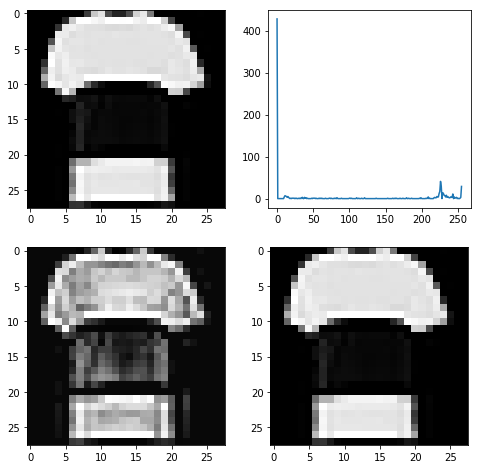

In [178]:
dull = cv2.imread(DATASET_PATH+'dull5.png',0)

# manually equalize
hist,bins = np.histogram(dull.flatten(),256,[0,256])
hist[0] = np.sum(hist[:10])
hist[1:10] = 0
hist_m = hist[1:]
print('---------hist----------')
print(hist)
print(np.sum(hist_m[:180]))
print(np.sum(hist_m[180:]))
if np.sum(hist_m[:180]) > np.sum(hist_m[180:]):
    cdf = hist.cumsum()
    print('---------old cdf----------')
    print(cdf)
    cdf_normalized = cdf * float(hist.max()) / cdf.max()
    print('---------cdf_normalized----------')
    print(cdf_normalized)    
    cdf_m = np.ma.masked_equal(cdf,0) # mask an array is like filter out the unwanted element(s) in an array
    print('---------cdf_m----------')
    print(cdf_m.min())
    print(cdf_m)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    print('---------new cdf----------')
    print(cdf)
    new = cdf[dull]
else:
    new = dull
# print(new)

# clahe
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(dull)

aa= dull.copy()
aa[aa>50]=255
plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(dull,cmap='gray')
plt.subplot(222); plt.plot(hist)
plt.subplot(223); plt.imshow(cl1,cmap='gray')
plt.subplot(224); plt.imshow(new.reshape(28,28), cmap='gray')

In [25]:
# manually equalize
# arg 'array': a row of pixel values without label
def equalize(array):
    hist,bins = np.histogram(array.flatten(),256,[0,256])
    hist[0] = np.sum(hist[:10])
    hist[1:10] = 0    
    hist_m = hist[1:] 
    if np.sum(hist_m[:180]) > np.sum(hist_m[180:]): # check if img(after removing black bg) is dull
        cdf = hist.cumsum()
        cdf_normalized = cdf * float(hist.max()) / cdf.max()
        cdf_m = np.ma.masked_equal(cdf,0) # mask an array is like filter out the unwanted element(s) in an array
        cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
        cdf = np.ma.filled(cdf_m,0).astype('uint8')
        return cdf[array]
    return array
        
        

In [26]:
# convert values[0,255] to [0,1]
# arg 'array': a row of pixel values without label
# arg 'threshold': values<threshold -> 0; values>=threshold -> 1
def to_binary(array,threshold=10):
    array[array<threshold] = 0
    array[array>=threshold] = 1 
    return array

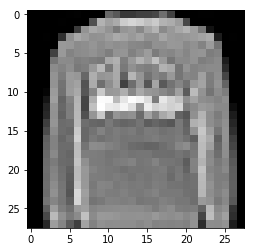

In [6]:
# plt.imshow(cv2.cvtColor(df.drop(labels=['label'],axis=1).loc[0,:].values.reshape(28,28), cv2.COLOR_BGR2RGB))
plt.imshow(df.drop(labels=['label'],axis=1).loc[7880,:].values.reshape(28,28), cmap='gray')

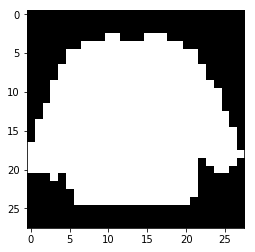

In [41]:
sample = df.drop(labels=['label'],axis=1).loc[0,:].values
sample_binary = np.where(~(sample>30),0,1)
# train_df[pixels_header].where((train_df[pixels_header]>0),other=1)
plt.imshow(sample_binary.reshape(28,28),cmap='gray')

### Convert np arrays to images (train and test set)

In [187]:
pixels_header = df.drop(labels=['label'],axis=1).columns.values
train_df = df.copy()

In [78]:
threshold = 10

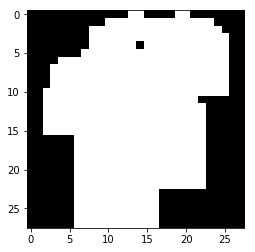

In [97]:
train_pixel = train_df.drop(labels=['label'],axis=1)
new[new<10] = 0
new[new>=10] = 1

plt.imshow(new.reshape(28,28), cmap='gray')

In [188]:
equalized_arrays = []
for row in df.drop(labels=['label'],axis=1).values:
    equalized_arrays.append(to_binary(equalize(row),threshold=10))

In [189]:
train_label = df['label'].values

for i in range(10):
    directory = DATASET_PATH+'fashion-img/train_equalized/'+str(i)
    if not os.path.exists(directory):
        os.makedirs(directory)

counts = np.zeros(10)
for i,x in enumerate(np.asarray(equalized_arrays[:])):
    plt.imsave('fashion-img/train_equalized/'+str(train_label[i])+'/'+str(int(counts[train_label[i]]))+'.png',x.reshape(28,28),cmap='gray')
    counts[train_label[i]]+=1

In [27]:
test_df = pd.read_csv('mnist_test2.csv',names=df.columns.values)
test_label = test_df['label'].values
equalized_arrays = []
for row in test_df.drop(labels=['label'],axis=1).values:
    equalized_arrays.append(to_binary(equalize(row),threshold=10))

for i in range(10):
    directory = DATASET_PATH+'fashion-img/test_equalized/'+str(i)
    if not os.path.exists(directory):
        os.makedirs(directory)

counts = np.zeros(10)
for i,x in enumerate(np.asarray(equalized_arrays[:])):
    plt.imsave('fashion-img/test_equalized/'+str(test_label[i])+'/'+str(int(counts[test_label[i]]))+'.png',x.reshape(28,28),cmap='gray')
    counts[test_label[i]]+=1

### Read image data

In [3]:
train_imgs = []
for i in range(10):
    mypath = 'fashion-img/train_equalized/'+str(i)+'/'
    train_imgs+=[cv2.imread('fashion-img/train_equalized/'+str(i)+'/'+f,0) for f in listdir(mypath) if isfile(join(mypath, f))]
print(np.asarray(train_imgs).shape)


(60000, 28, 28)


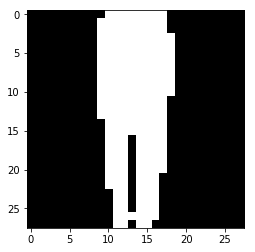

In [4]:
plt.imshow(train_imgs[6200],cmap='gray')  # cv2.imshow doesn't work, why?

In [5]:
test_imgs = []
for i in range(10):
    mypath = 'fashion-img/test_equalized/'+str(i)+'/'
    test_imgs+=[cv2.imread('fashion-img/test_equalized/'+str(i)+'/'+f,0) for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
# load images has values of 0 and 255, so convert them to 0 and 1
train_imgs = np.where(np.asarray(train_imgs)>0, 1, 0)
test_imgs = np.where(np.asarray(test_imgs)>0, 1, 0)

In [7]:
np.asarray(test_imgs[0]).shape

(28, 28)

In [7]:
train_labels =[]
for i in range(10):
    train_labels.extend(np.full(6000,i))
    
test_labels =[]
for i in range(10):
    test_labels.extend(np.full(1000,i))

In [171]:
np.asarray(test_labels).shape

(10000,)

### Closing morphology (dilation -> erosion)

In [8]:
k_33 = (3,3)
k_55 = (5,5)
k_77 = (7,7)

In [9]:
# class 0,2,5,7: open(5,5), close(5,5) x2
# class 4: open(5,5), close(5,5), close(3,3)
# class 1,6: open(5,5), close(3,3), close(3,3)
# class 8,9: open(5,5), close(5,5), close(7,7)
opening_train = []
class_no = 0
while True:
    for i,img in enumerate(train_imgs[class_no*6000:class_no*6000+6000]):
        if (class_no==0) & (class_no==2) & (class_no==5) & (class_no==7):
            opening_train.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_55))
        elif (class_no==4):
            opening_train.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_33))
        elif (class_no==1) & (class_no==6):
            opening_train.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_33), cv2.MORPH_CLOSE, k_33))
        else:
            opening_train.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_77))
    if class_no==9:
        break
    class_no+=1

In [10]:
preprocessed_test = []
class_no = 0
while True:
    for i,img in enumerate(test_imgs[class_no*1000:class_no*1000+1000]):
        if (class_no==0) & (class_no==2) & (class_no==5) & (class_no==7):
            preprocessed_test.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_55))
        elif (class_no==4):
            preprocessed_test.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_33))
        elif (class_no==1) & (class_no==6):
            preprocessed_test.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_33), cv2.MORPH_CLOSE, k_33))
        else:
            preprocessed_test.append(cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_55), cv2.MORPH_CLOSE, k_77))
    if class_no==9:
        break
    class_no+=1

In [12]:
i = 6000
yoyo = [cv2.morphologyEx(np.float32(img), cv2.MORPH_OPEN, k_55) for img in train_imgs[i:i+6000]]
yoyo2 = [cv2.morphologyEx(cv2.morphologyEx(np.float32(img), cv2.MORPH_CLOSE, k_33), cv2.MORPH_CLOSE, k_33) for img in train_imgs[i:i+6000]]

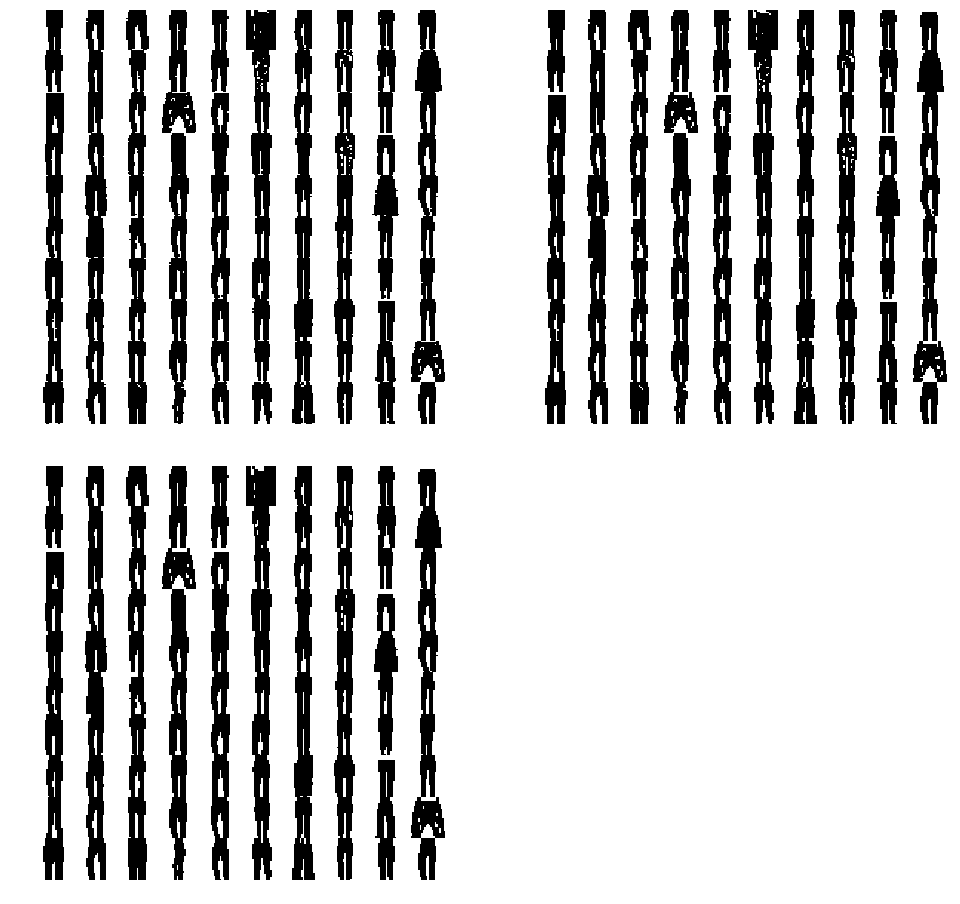

In [13]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(18, 16))
plot_no = 1
random_num = np.random.randint(0,len(yoyo),100)
# for i np.random.randint(0,len(opening_train[0]),25):
# plt.subplot(111); plot_digits([opening_train[2][idx] for idx in np.random.randint(0,len(opening_train[2]),150)],images_per_row=15)
plt.subplot(221); plot_digits([train_imgs[idx+6000] for idx in random_num],images_per_row=10)
plt.subplot(222); plot_digits([yoyo[idx] for idx in random_num],images_per_row=10)
plt.subplot(223); plot_digits([yoyo2[idx] for idx in random_num],images_per_row=10)
plt.subplots_adjust(wspace=0,hspace=0.1)

# for i, ax in enumerate(ax.flatten()):
# #     im_idx = np.argwhere(y == i)[0]
# #     plottable_image = np.reshape(X[im_idx], (28, 28))
    
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.imshow(opening_train[0][i], cmap='gray_r')
#     fig.subplots_adjust(top=.5,left=.25)
#     fig.tight_layout()

### Train model

In [11]:
opening_train = np.asarray(opening_train)
opening_train = opening_train.reshape(opening_train.shape[0],opening_train.shape[1],opening_train.shape[2],1)
encoded_train_labels = pd.get_dummies(np.asarray(train_labels)).values
X_train, X_val, y_train, y_val = train_test_split(opening_train, encoded_train_labels, test_size=0.1, random_state=42)


In [16]:
# same as the above, but do for test set
preprocessed_test = np.asarray(preprocessed_test)
preprocessed_test = preprocessed_test.reshape(preprocessed_test.shape[0],preprocessed_test.shape[1],preprocessed_test.shape[2],1)
encoded_test_labels = pd.get_dummies(np.asarray(test_labels)).values
preprocessed_test, encoded_test_labels = shuffle(preprocessed_test, encoded_test_labels)

In [135]:
np.asarray(opening_train[10000]).shape
opening_train[10000]

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
  

In [16]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16592425934470564393
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1492117094
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12122199992108865343
physical_device_desc: "device: 0, name: GeForce 840M, pci bus id: 0000:04:00.0, compute capability: 5.0"
]


Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [18]:
# tf.reset_default_graph()

keras.backend.clear_session()
n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_output = 10


checkpointer = ModelCheckpoint(filepath="D:/fashionmnist/best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

model = keras.Sequential([
    # 28x28x1 -> 22x22x8
    keras.layers.Conv2D(input_shape=np.asarray(X_train).shape[1:], filters=8, kernel_size=[7,7], strides=[1,1], padding='same', use_bias='True', activation='relu'),

    # 22x22x8 -> 18x18x16
    keras.layers.Conv2D(filters=16, kernel_size=[5,5], strides=[1,1], padding='same', use_bias='True', activation='relu'),
    # 149x109x3x32 -> 74x54x3x32
#     keras.layers.MaxPool2D(pool_size=[2,2], strides=[2, 2], padding='same'),

    # 18x18x16 -> 14x14x32
    keras.layers.Conv2D(filters=32, kernel_size=[5,5], strides=[1,1], padding='same', use_bias='True', activation='relu'),
#     keras.layers.SpatialDropout2D(rate=.1),
    
    # 14x14x32 -> 10x10x48
#     keras.layers.Conv2D(filters=48, kernel_size=[5,5], strides=[1,1], padding='same', use_bias='True', activation='relu'),

    # output = 10x10x48 = 4800
    keras.layers.Flatten(), 
    
    # 4800 -> 512
#     keras.layers.Dense(units=512, use_bias='True', activation='relu'),
#     keras.layers.Dropout(rate=0.2),
    # 512 -> 128
    keras.layers.Dense(units=128, use_bias='True', activation='LeakyReLU'),
    keras.layers.Dropout(rate=0.1),
    # 256 -> 128
    keras.layers.Dense(units=32, use_bias='True', activation='LeakyReLU'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 92s 2ms/step - loss: 0.4427 - acc: 0.8347 - val_loss: 0.3390 - val_acc: 0.8687

Epoch 00001: val_acc improved from -inf to 0.86867, saving model to D:/fashionmnist/best_weights.hdf5
Epoch 2/20
54000/54000 [==============================] - 91s 2ms/step - loss: 0.3244 - acc: 0.8753 - val_loss: 0.3114 - val_acc: 0.8810

Epoch 00002: val_acc improved from 0.86867 to 0.88100, saving model to D:/fashionmnist/best_weights.hdf5
Epoch 3/20
54000/54000 [==============================] - 92s 2ms/step - loss: 0.2810 - acc: 0.8916 - val_loss: 0.3114 - val_acc: 0.8822

Epoch 00003: val_acc improved from 0.88100 to 0.88217, saving model to D:/fashionmnist/best_weights.hdf5
Epoch 4/20
54000/54000 [==============================] - 92s 2ms/step - loss: 0.2470 - acc: 0.9042 - val_loss: 0.3218 - val_acc: 0.8878

Epoch 00004: val_acc improved from 0.88217 to 0.88783, saving model to D:/fashionmnist/

KeyboardInterrupt: 

In [18]:
keras.backend.clear_session()
n_input = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_output = 10


checkpointer = ModelCheckpoint(filepath="D:/fashionmnist/best_weights3.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

model3 = keras.Sequential([
    # 28x28x1 -> 22x22x8
    keras.layers.Conv2D(input_shape=np.asarray(X_train).shape[1:], filters=8, kernel_size=[5,5], strides=[1,1], padding='same', use_bias='True'),
    keras.layers.LeakyReLU(),
    keras.layers.SpatialDropout2D(rate=.5),

    # 22x22x8 -> 18x18x16
    keras.layers.Conv2D(filters=16, kernel_size=[3,3], strides=[1,1], padding='same', use_bias='True'),
    keras.layers.LeakyReLU(),
    keras.layers.SpatialDropout2D(rate=.5),
    # 149x109x3x32 -> 74x54x3x32
#     keras.layers.MaxPool2D(pool_size=[2,2], strides=[2, 2], padding='same'),

    # 18x18x16 -> 14x14x32
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], strides=[1,1], padding='same', use_bias='True'),
    keras.layers.LeakyReLU(),
    keras.layers.SpatialDropout2D(rate=.2),
    
    # 14x14x32 -> 10x10x48
#     keras.layers.Conv2D(filters=48, kernel_size=[3,3], strides=[1,1], padding='same', use_bias='True'),
#     keras.layers.LeakyReLU(),
#     keras.layers.SpatialDropout2D(rate=.2),

    # output = 10x10x48 = 4800
    keras.layers.Flatten(), 
    
    # 4800 -> 512
#     keras.layers.Dense(units=512, use_bias='True', activation='relu'),
#     keras.layers.Dropout(rate=0.2),
    # 512 -> 128
    keras.layers.Dense(units=128, use_bias='True'),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.5),
    # 256 -> 128
    keras.layers.Dense(units=32, use_bias='True'),
    keras.layers.LeakyReLU(),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=100, batch_size=1000, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 74s 1ms/step - loss: 1.2179 - acc: 0.5791 - val_loss: 0.5642 - val_acc: 0.7887

Epoch 00001: val_acc improved from -inf to 0.78867, saving model to D:/fashionmnist/best_weights3.hdf5
Epoch 2/100
54000/54000 [==============================] - 72s 1ms/step - loss: 0.6654 - acc: 0.7700 - val_loss: 0.4422 - val_acc: 0.8332

Epoch 00002: val_acc improved from 0.78867 to 0.83317, saving model to D:/fashionmnist/best_weights3.hdf5
Epoch 3/100
54000/54000 [==============================] - 72s 1ms/step - loss: 0.5811 - acc: 0.7986 - val_loss: 0.4205 - val_acc: 0.8378

Epoch 00003: val_acc improved from 0.83317 to 0.83783, saving model to D:/fashionmnist/best_weights3.hdf5
Epoch 4/100
54000/54000 [==============================] - 72s 1ms/step - loss: 0.5329 - acc: 0.8119 - val_loss: 0.3984 - val_acc: 0.8455

Epoch 00004: val_acc improved from 0.83783 to 0.84550, saving model to D:/fashio

54000/54000 [==============================] - 79s 1ms/step - loss: 0.3410 - acc: 0.8725 - val_loss: 0.3254 - val_acc: 0.8793

Epoch 00039: val_acc improved from 0.87817 to 0.87933, saving model to D:/fashionmnist/best_weights3.hdf5
Epoch 40/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.3421 - acc: 0.8712 - val_loss: 0.3319 - val_acc: 0.8752

Epoch 00040: val_acc did not improve from 0.87933
Epoch 41/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.3412 - acc: 0.8715 - val_loss: 0.3294 - val_acc: 0.8795

Epoch 00041: val_acc improved from 0.87933 to 0.87950, saving model to D:/fashionmnist/best_weights3.hdf5
Epoch 42/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.3366 - acc: 0.8742 - val_loss: 0.3347 - val_acc: 0.8758

Epoch 00042: val_acc did not improve from 0.87950
Epoch 43/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.3412 - acc: 0.8737 - val_loss: 0.3256 - val_acc: 0.8802

E

54000/54000 [==============================] - 79s 1ms/step - loss: 0.2928 - acc: 0.8883 - val_loss: 0.3351 - val_acc: 0.8787

Epoch 00081: val_acc did not improve from 0.88083
Epoch 82/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2903 - acc: 0.8880 - val_loss: 0.3328 - val_acc: 0.8797

Epoch 00082: val_acc did not improve from 0.88083
Epoch 83/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2894 - acc: 0.8901 - val_loss: 0.3392 - val_acc: 0.8777

Epoch 00083: val_acc did not improve from 0.88083
Epoch 84/100
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2900 - acc: 0.8894 - val_loss: 0.3330 - val_acc: 0.8782

Epoch 00084: val_acc did not improve from 0.88083
Epoch 85/100
54000/54000 [==============================] - 80s 1ms/step - loss: 0.2927 - acc: 0.8888 - val_loss: 0.3355 - val_acc: 0.8745

Epoch 00085: val_acc did not improve from 0.88083
Epoch 86/100
54000/54000 [==============================] - 79s

### Performance

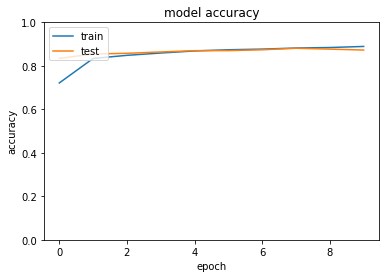

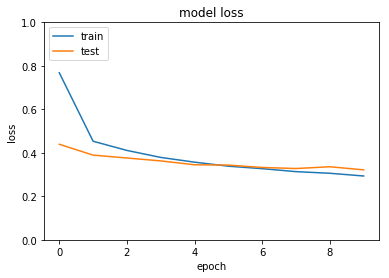

In [106]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,max(max(history2.history['loss']), max(max(history.history['val_loss']),1)))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
loss, accuracy = model2.evaluate(preprocessed_test, encoded_test_labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))
# encoded_y_test
y_pred = model2.predict(preprocessed_test)
y_pred = np.argmax(np.round(y_pred,2),1)
test_label = np.argmax(encoded_test_labels,1)
print ("Precision", precision_score(test_label, y_pred, average='micro'))
print ("Recall", recall_score(test_label, y_pred, average='micro'))
print ("f1_score", f1_score(test_label, y_pred, average='micro'))
print ("confusion_matrix\n", confusion_matrix(test_label, y_pred))

Accuracy: 89.860000
Precision 0.8981
Recall 0.8981
f1_score 0.8981
confusion_matrix
 [[864   1  14   9   2   0 107   0   3   0]
 [  2 988   1   7   1   0   0   0   1   0]
 [ 12   0 805   9 125   0  49   0   0   0]
 [ 11  13   5 921  33   0  13   0   4   0]
 [  0   0  64  18 873   0  44   0   1   0]
 [  0   0   0   0   0 982   0  14   1   3]
 [153   3  85  17 120   0 618   0   4   0]
 [  0   0   0   0   0   6   0 972   0  22]
 [  1   0   2   1   3   0   5   1 986   1]
 [  0   0   0   0   0   1   0  26   1 972]]


### Visualize each layer output

[0, 1, 3]
0 conv2d (?, 28, 28, 8)
1 conv2d_1 (?, 28, 28, 16)
2 spatial_dropout2d (?, 28, 28, 16)
3 conv2d_2 (?, 28, 28, 32)
4 spatial_dropout2d_1 (?, 28, 28, 32)
7.0
3
(5, 5, 1, 8)
(3, 3, 8, 16)
(3, 3, 16, 32)


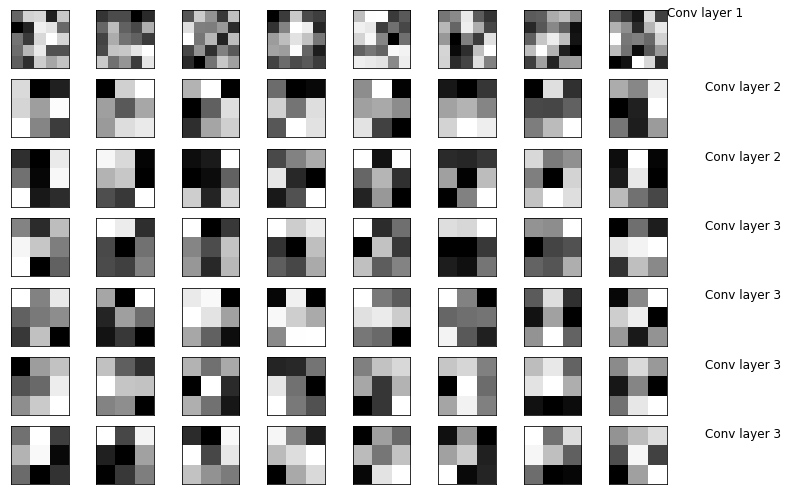

In [103]:
visualizable_layer = [i for i in range(len(model.layers)) if 'conv' in model2.layers[i].name]
print(visualizable_layer)
for i in range(len(model.layers)):
    print(i, model2.layers[i].name, model2.layers[i].output.shape)
n_filters = np.ceil(int(sum([model2.layers[i].output.shape[-1] for i in visualizable_layer]))/8)
print(n_filters)

# retrieve weights from the second hidden layer
all_filters = []
for i in visualizable_layer:
    filters = model2.layers[i].get_weights()[0]

    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    all_filters.append(filters)

# plot first few filters
n_filters, n_col, ix, n_channel = 8, 8, 1, 1
plt.figure(figsize=(12,10))
print(len(all_filters))
for k in range(len(all_filters)):
    print(np.asarray(all_filters[k]).shape)
    for i in range(np.asarray(all_filters[k]).shape[-1]):
        # get the filter
        f = all_filters[k][:, :, :, i]
        # plot each channel separately
        for j in range(n_channel):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, n_col, ix)
            if ix%8==0:
#                 ax.set_ylabel('Conv layer '+str(k), rotation=0, size='medium', position=(.5,.5))
#                 ax.yaxis.set_label_position("right")
                ax.text(4.5, 0.08, 'Conv layer '+str(k+1), size='large')
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, 0], cmap='gray')
            ix += 1
        
# show the figure
# plt.subplots_adjust(right=0.80)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         208       
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________
(?, 28, 28, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         208       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
Total params: 1,376
Trainable params: 1,376
Non-trainable param

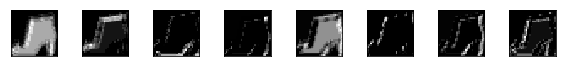

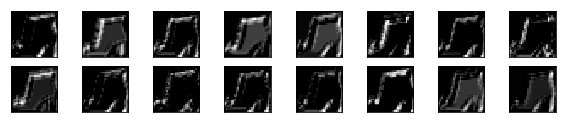

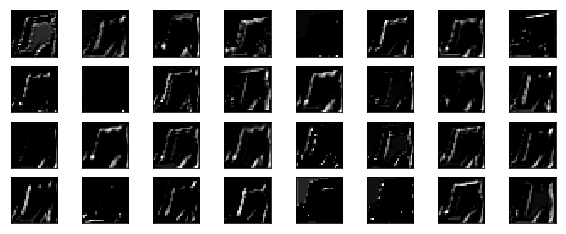

In [128]:
# print(len(model.layers))
# redefine model to output right after the first hidden layer
layer_models = [keras.models.Model(inputs=model2.inputs, outputs=model2.layers[i].output) for i in visualizable_layer]

for i,model in enumerate(layer_models):
    model.summary()
    print(model.layers[1].output.shape)

    # expand dimensions so that it represents a single 'sample'
    test_img = np.expand_dims(preprocessed_test[9000], axis=0)
    # prepare the image (e.g. scale pixel values for the vgg)
    # img = preprocess_input(img)
    # get feature map for first hidden layer
    feature_maps = model.predict(test_img)
    # plot all 64 maps in an 8x8 squares
    square = 8
    ix = 1
    plt.figure(figsize=(10,8))
    for _ in range(model.layers[visualizable_layer[i]+1].output.shape[-1]):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()